In [10]:
from modules.storage import get_finished_games
from modules.analyze import prepare_metrics_list, print_total_under_result, analyze_correlation, analyze_total_under_avg_udi
from settings import composite_metrics

df = get_finished_games()
metrics_list = prepare_metrics_list(composite_metrics)

In [11]:
segmented_df = df.loc[
    (df['home_team_finished_games'] >= 3) & (df['away_team_finished_games'] >= 3) &
    (df['odds_home_open'] > 0) & (df['odds_total_under_2_5_open'] > 0) &
    (df['odds_home_open'] >= 1.8) & (df['odds_home_open'] <= 2.8) &
    (df['odds_total_under_2_5_open'] >= 2.0) & (df['odds_total_under_2_5_open'] <= 2.5)
]

Count: 8093
Open profit: 112.63000000000005
Close profit: 130.378
Open ROI: 0.013916965278635864
Close ROI: 0.016109971580378104
UDI: -0.0026467317434820206
AxesSubplot(0.125,0.125;0.775x0.755)


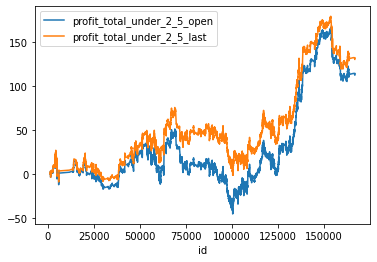

In [12]:
print_total_under_result(segmented_df)

In [13]:
analyze_correlation(segmented_df, 'total', metrics_list)

,correlation
expected_total,0.081721
expected_total_loc,0.030724
expected_difference_loc,0.018951
expected_difference,0.012036


In [14]:
analyze_total_under_avg_udi(segmented_df, metrics_list)

,low,high,diff
expected_total_loc,3.317378,2.834042,0.483336
expected_total,2.740798,2.336566,0.404233
expected_difference_loc,-0.322615,-0.259566,0.063049
expected_difference,-0.001198,-0.029478,0.028280


In [15]:
updated_segmented_df = segmented_df.loc[
    (segmented_df['expected_total'] <= 2.33) & (segmented_df['expected_total_loc'] <= 2.83)
]

analyze_total_under_avg_udi(updated_segmented_df, [
    'expected_total',
    'expected_total_loc'
])

,low,high,diff
expected_total,2.081015,1.990393,0.090621
expected_total_loc,2.197808,2.143020,0.054788


Count: 1574
Open profit: 146.76
Close profit: 72.869
Open ROI: 0.09324015247776365
Close ROI: 0.04629542566709022
UDI: 0.04799936467598475
AxesSubplot(0.125,0.125;0.775x0.755)


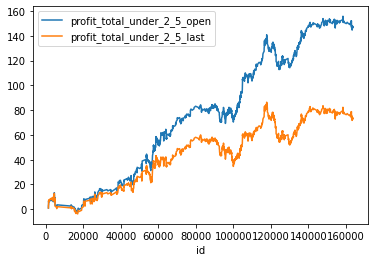

In [16]:
print_total_under_result(updated_segmented_df)

Count: 301
Open profit: 3.2100000000000035
Close profit: -15.591000000000003
Open ROI: 0.010664451827242537
Close ROI: -0.05179734219269104
UDI: 0.0737873754152824
AxesSubplot(0.125,0.125;0.775x0.755)


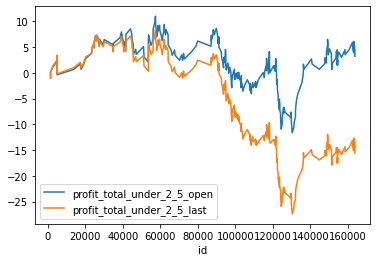

In [17]:
filtered_result_df = segmented_df.loc[
    (segmented_df['expected_total'] <= 1.99) & (segmented_df['expected_total_loc'] <= 2.14)
]
print_total_under_result(filtered_result_df)